Task 2.1: Summary Statistics & Missing-Value Report

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/raw/benin-malanville.csv')
# Task 2.1.1: Summary statistics
summary_stats = df.describe(percentiles=[.25, .5, .75])

# Task 2.1.2: Missing values
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

# Display results
print("Summary Statistics:")
display(summary_stats)
print("\nMissing Values Report:")
display(missing_report[missing_report['Missing Count'] > 0])

Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN



Missing Values Report:


,Missing Count,Missing %
Comments,525600,100.0


Task 2.2: Outlier Detection & Cleaning

In [13]:
from scipy import stats

# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers
for col in cols:
    df[f'{col}_z'] = stats.zscore(df[col])
    df[f'{col}_outlier'] = np.abs(df[f'{col}_z']) > 3

# Count outliers
outlier_report = df[[f'{col}_outlier' for col in cols]].sum()

# Handle missing values (>5%: impute, else drop)
high_missing = missing_report[missing_report['Missing %'] > 5].index
cols_to_drop = []

for col in high_missing:
    if df[col].isna().all():  # Check if column is entirely NaN
        cols_to_drop.append(col)
    else:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
# Drop columns with all NaN values
# df.drop(columns=cols_to_drop, inplace=True)
# Save cleaned data
# df.to_csv('../../data/clean/benin_clean.csv', index=False)

KeyError: 'Comments'

Task 2.3: Time Series Analysis

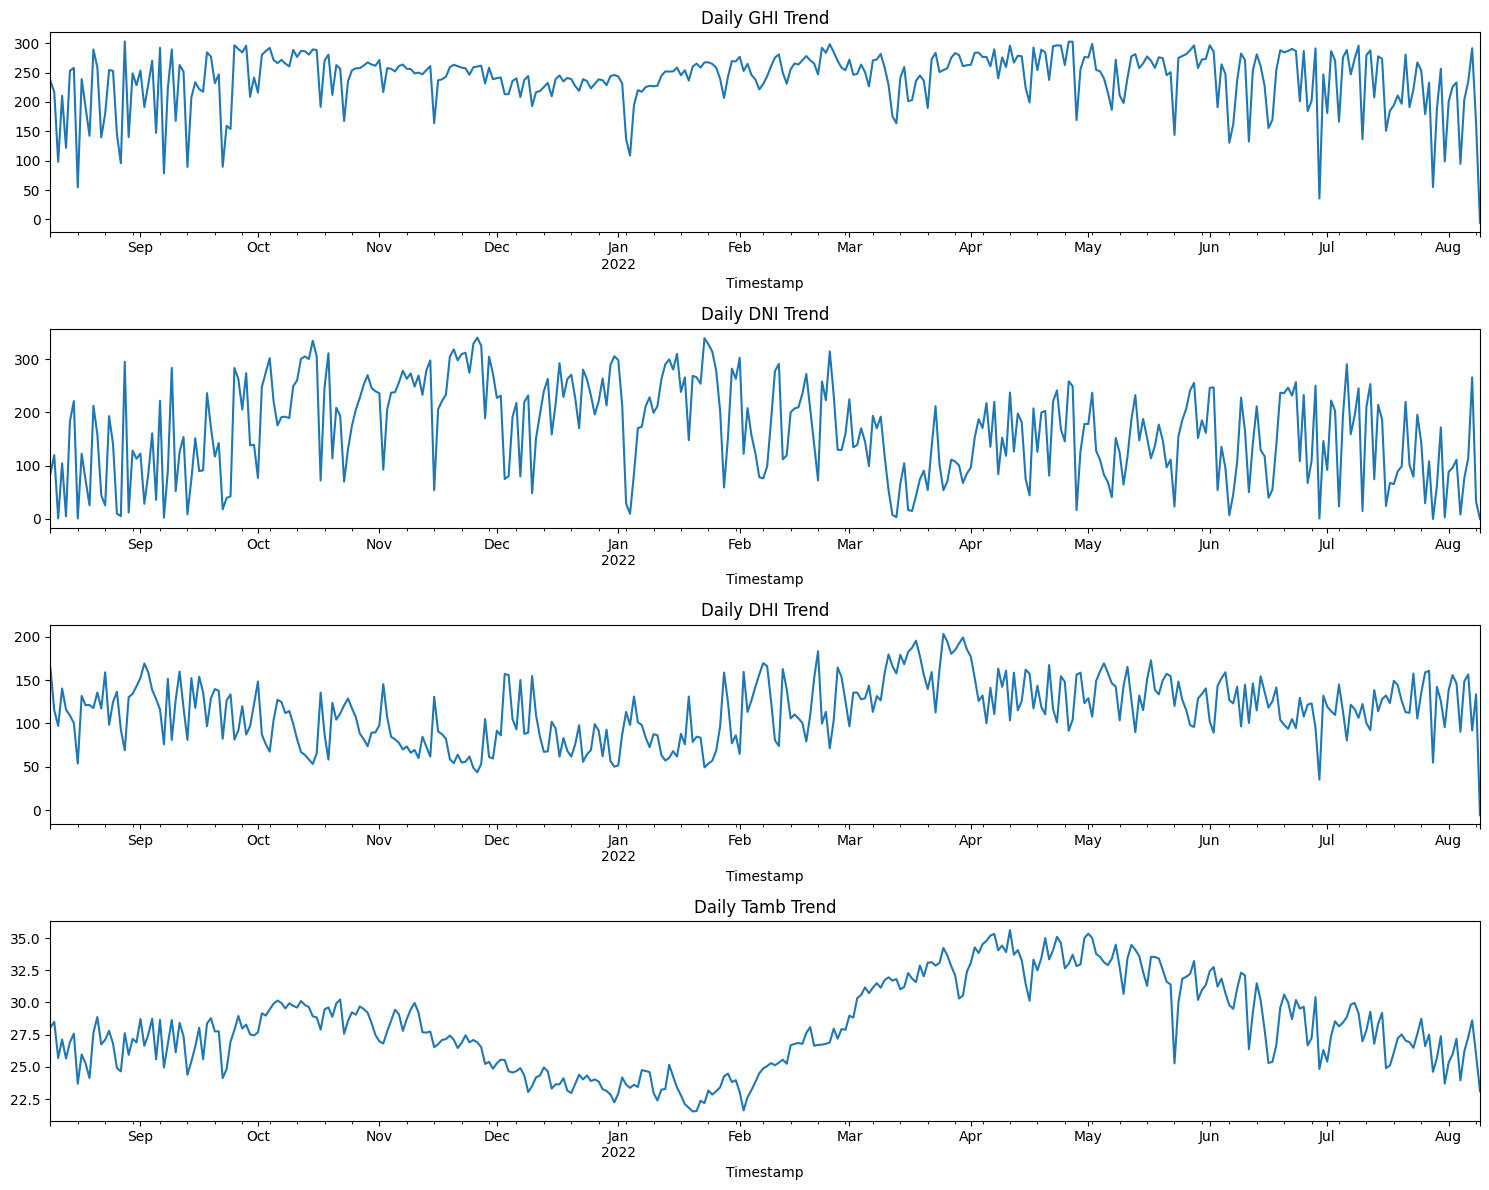

In [4]:
import matplotlib.pyplot as plt

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
for i, metric in enumerate(metrics):
    df[metric].resample('D').mean().plot(ax=axes[i], title=f'Daily {metric} Trend')
plt.tight_layout()
plt.show()

Task 2.4: Cleaning Impact Analysis

<Figure size 800x400 with 0 Axes>

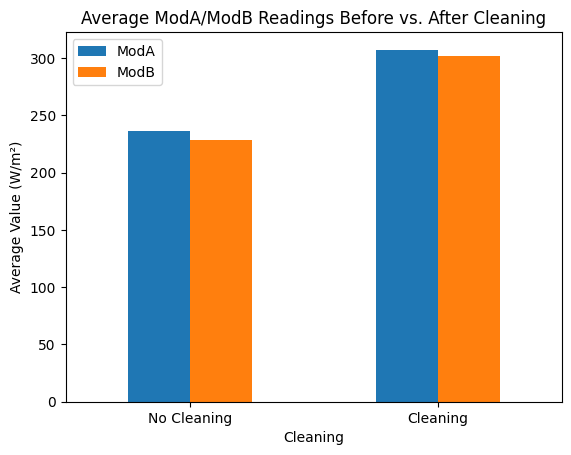

In [5]:
# Group by Cleaning flag
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot comparison
plt.figure(figsize=(8, 4))
cleaning_impact.set_index('Cleaning').plot(kind='bar', rot=0)
plt.title('Average ModA/ModB Readings Before vs. After Cleaning')
plt.xticks([0, 1], ['No Cleaning', 'Cleaning'])
plt.ylabel('Average Value (W/m²)')
plt.show()

Task 2.5: Correlation & Relationships

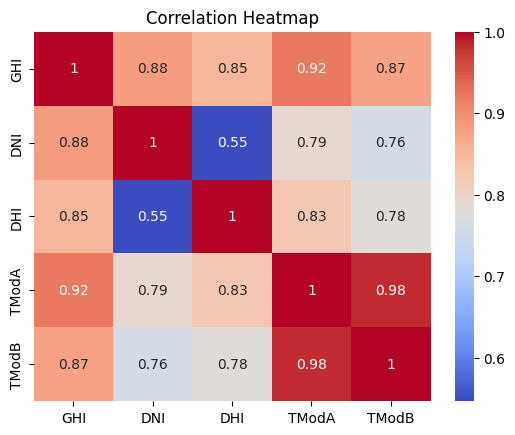

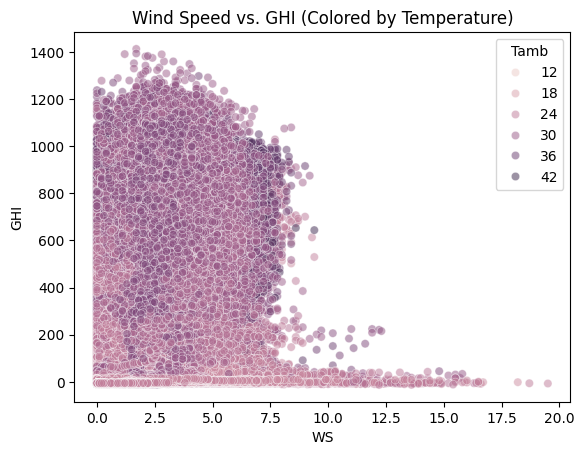

In [6]:
import seaborn as sns

# Heatmap
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plots
sns.scatterplot(data=df, x='WS', y='GHI', hue='Tamb', alpha=0.5)
plt.title('Wind Speed vs. GHI (Colored by Temperature)')
plt.show()

Task 2.6: Wind & Distribution Analysis

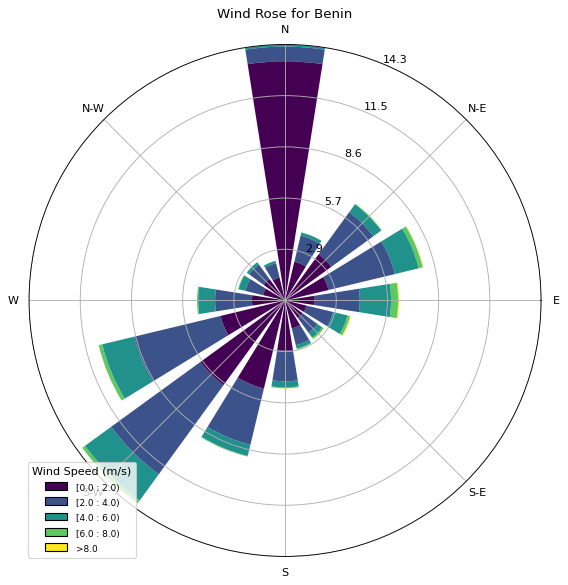

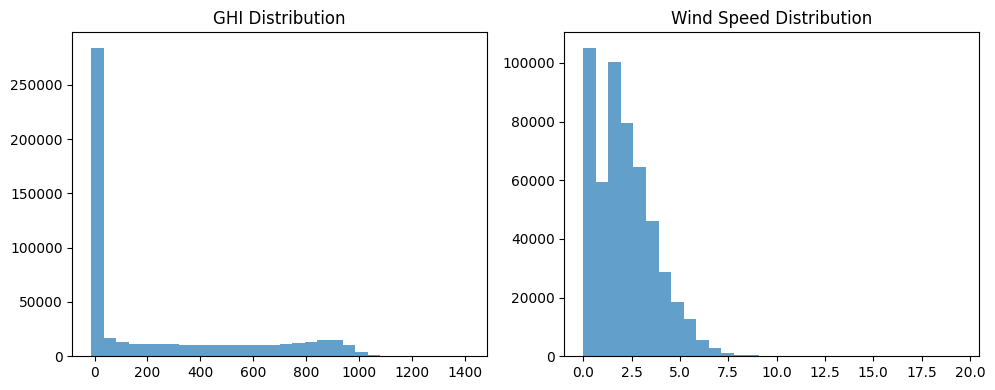

In [7]:
# Wind Rose (Install windrose: pip install windrose)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, bins=np.arange(0, 10, 2))
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose for Benin')
plt.show()

# Histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, alpha=0.7)
plt.title('GHI Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, alpha=0.7)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

Task 2.7: Temperature Analysis

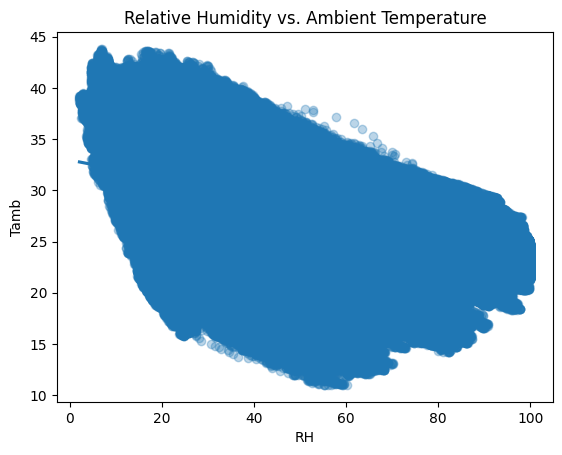

In [8]:
# RH vs. Tamb
sns.regplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha': 0.3})
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

Task 2.8: Bubble Chart

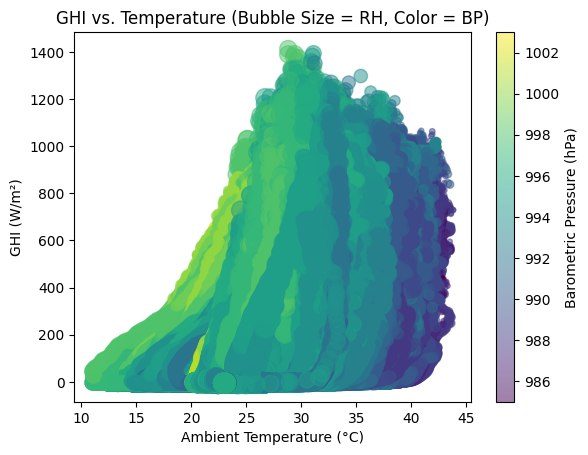

In [9]:
plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    s=df['RH']*2,  # Bubble size = RH
    c=df['BP'],     # Color = BP
    alpha=0.5,
    cmap='viridis'
)
plt.colorbar(label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Temperature (Bubble Size = RH, Color = BP)')
plt.show()